<a href="https://colab.research.google.com/github/dsgustavomoreira/Classificacao-Sinais-Transito-com-LeNet/blob/main/Classifica%C3%A7%C3%A3o_de_Sinais_de_Tr%C3%A2nsito_com_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de sinais de trânsito

# Etapa 1: Importação das bibliotecas

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import pickle
import zipfile


# Etapa 2: Importação da base de dados

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
path = '/content/drive/MyDrive/DS Gustavo Moreira/IA EXPERT/Arquivos/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/DS Gustavo Moreira/IA EXPERT/Arquivos/traffic-signs-data.zip' mode='r'>>

In [13]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [14]:
# A lista com 3 elementos representa cada um dos canais 'R', 'G', 'B'
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [15]:
# No resultado do código anterior tem-se as 'features' e abaixo os 'labels'
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [16]:
# número de registros > altura > largura > 3 canais
X_train.shape

(34799, 32, 32, 3)

In [17]:
y_train.shape

(34799,)

In [18]:
X_test.shape

(12630, 32, 32, 3)

In [19]:
y_test.shape

(12630,)

In [20]:
X_validation.shape

(4410, 32, 32, 3)

In [21]:
y_validation.shape

(4410,)

# Etapa 3: Visualização dos dados

1

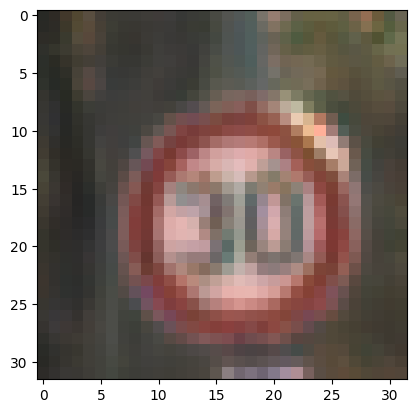

In [22]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

36

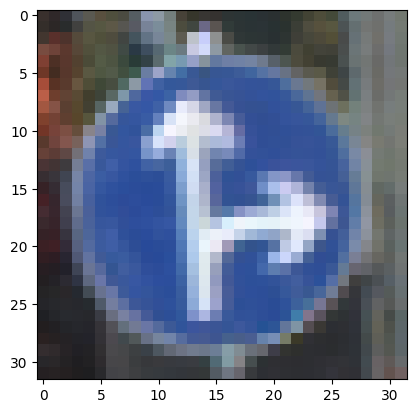

In [23]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

20

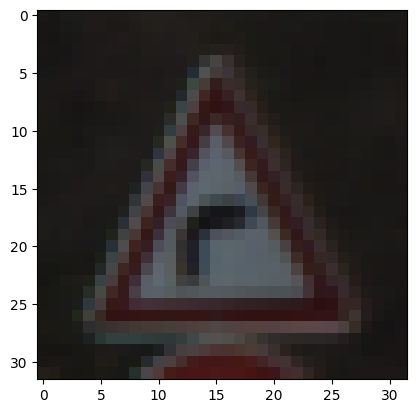

In [24]:
i = 3323
plt.imshow(X_validation[i])
y_validation[i]

# Etapa 4: Preparação dos dados

In [25]:
# Função do sklear para misturar os dados ('shuffle' = aleatório). Colocando-os em um posicionamento consistente.
# Em alguns casos sugere-se utilizar antes de dividir a base em treino e teste
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [26]:
# Converter as imagens em escala de cinza para dar agilidade à Rede Neural através de média dos 3 valores do RGB
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [27]:
# Resultado com apenas 1 canal
X_train_gray.shape

(34799, 32, 32, 1)

In [28]:
X_test_gray.shape

(12630, 32, 32, 1)

In [29]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [30]:
# Normalização das features
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [31]:
np.max(X_train_gray_norm)

0.9921875

In [32]:
np.min(X_train_gray_norm)

-0.9713541666666666

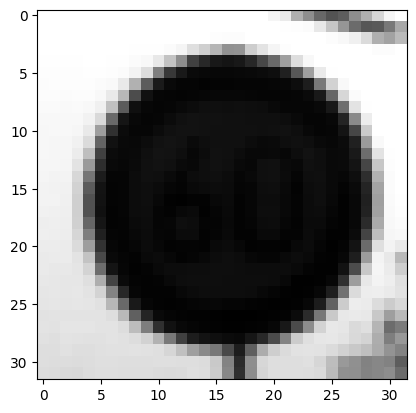

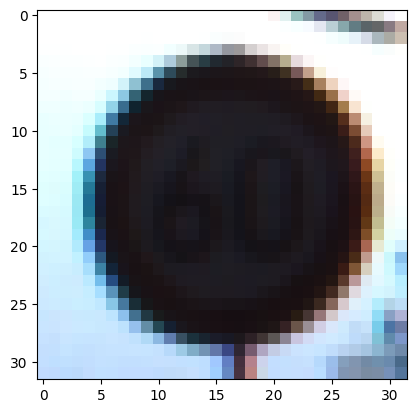

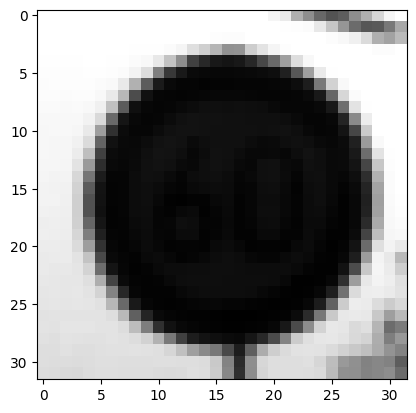

In [33]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# ETAPA 5: Criação do modelo e treinamento

In [39]:
from tensorflow.keras import layers, models
lenet = models.Sequential()

lenet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(120, activation = 'relu'))

lenet.add(layers.Dense(84, activation = 'relu'))

lenet.add(layers.Dense(43, activation = 'softmax'))

lenet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_10 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_11 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [42]:
lenet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [43]:
history = lenet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 21s 244ms/step - loss: 3.1823 - accuracy: 0.1751 - val_loss: 2.8624 - val_accuracy: 0.2937
Epoch 2/50
70/70 [==============================] - 15s 219ms/step - loss: 1.7717 - accuracy: 0.5173 - val_loss: 1.4986 - val_accuracy: 0.5610
Epoch 3/50
70/70 [==============================] - 17s 246ms/step - loss: 0.9476 - accuracy: 0.7317 - val_loss: 1.0685 - val_accuracy: 0.6764
Epoch 4/50
70/70 [==============================] - 18s 261ms/step - loss: 0.6657 - accuracy: 0.8195 - val_loss: 0.8508 - val_accuracy: 0.7556
Epoch 5/50
70/70 [==============================] - 17s 239ms/step - loss: 0.5247 - accuracy: 0.8615 - val_loss: 0.7325 - val_accuracy: 0.7871
Epoch 6/50
70/70 [==============================] - 18s 262ms/step - loss: 0.4305 - accuracy: 0.8883 - val_loss: 0.7081 - val_accuracy: 0.7971
Epoch 7/50
70/70 [==============================] - 16s 221ms/step - loss: 0.3644 - accuracy: 0.9076 - val_loss: 0.6298 - val_accuracy: 0.8227

# ETAPA 6: Avaliação do modelo

In [44]:
score = lenet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 1.1286 - accuracy: 0.8756
Test Accuracy: 0.8756136298179626


In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
val_accuracy

[0.2936508059501648,
 0.560997724533081,
 0.6764172315597534,
 0.7555555701255798,
 0.7870748043060303,
 0.7970521450042725,
 0.8226757645606995,
 0.8312925100326538,
 0.844897985458374,
 0.8480725884437561,
 0.8585034012794495,
 0.859183669090271,
 0.8517006635665894,
 0.866439938545227,
 0.8639456033706665,
 0.8639456033706665,
 0.8612244725227356,
 0.8625850081443787,
 0.8607710003852844,
 0.8668934106826782,
 0.8528344631195068,
 0.866439938545227,
 0.8696145415306091,
 0.8666666746139526,
 0.8648526072502136,
 0.864625871181488,
 0.8603174686431885,
 0.8612244725227356,
 0.8764172196388245,
 0.8643990755081177,
 0.8621315360069275,
 0.858730137348175,
 0.8653061389923096,
 0.8650793433189392,
 0.8712018132209778,
 0.8757369518280029,
 0.863265335559845,
 0.8714285492897034,
 0.8585034012794495,
 0.8727891445159912,
 0.8693877458572388,
 0.8766440153121948,
 0.8585034012794495,
 0.8668934106826782,
 0.8687074780464172,
 0.8675736784934998,
 0.8671202063560486,
 0.8589569330215454,


<ipython-input-48-46d7eff3f114>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')


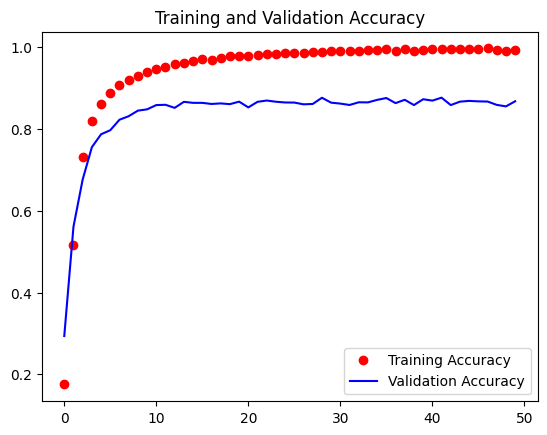

In [48]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

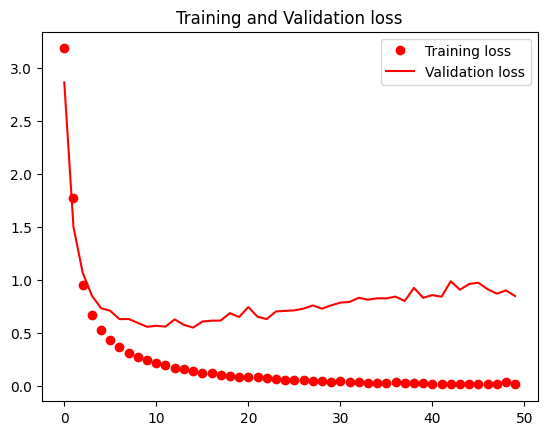

In [49]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [51]:
predict_x = lenet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 7s 16ms/step


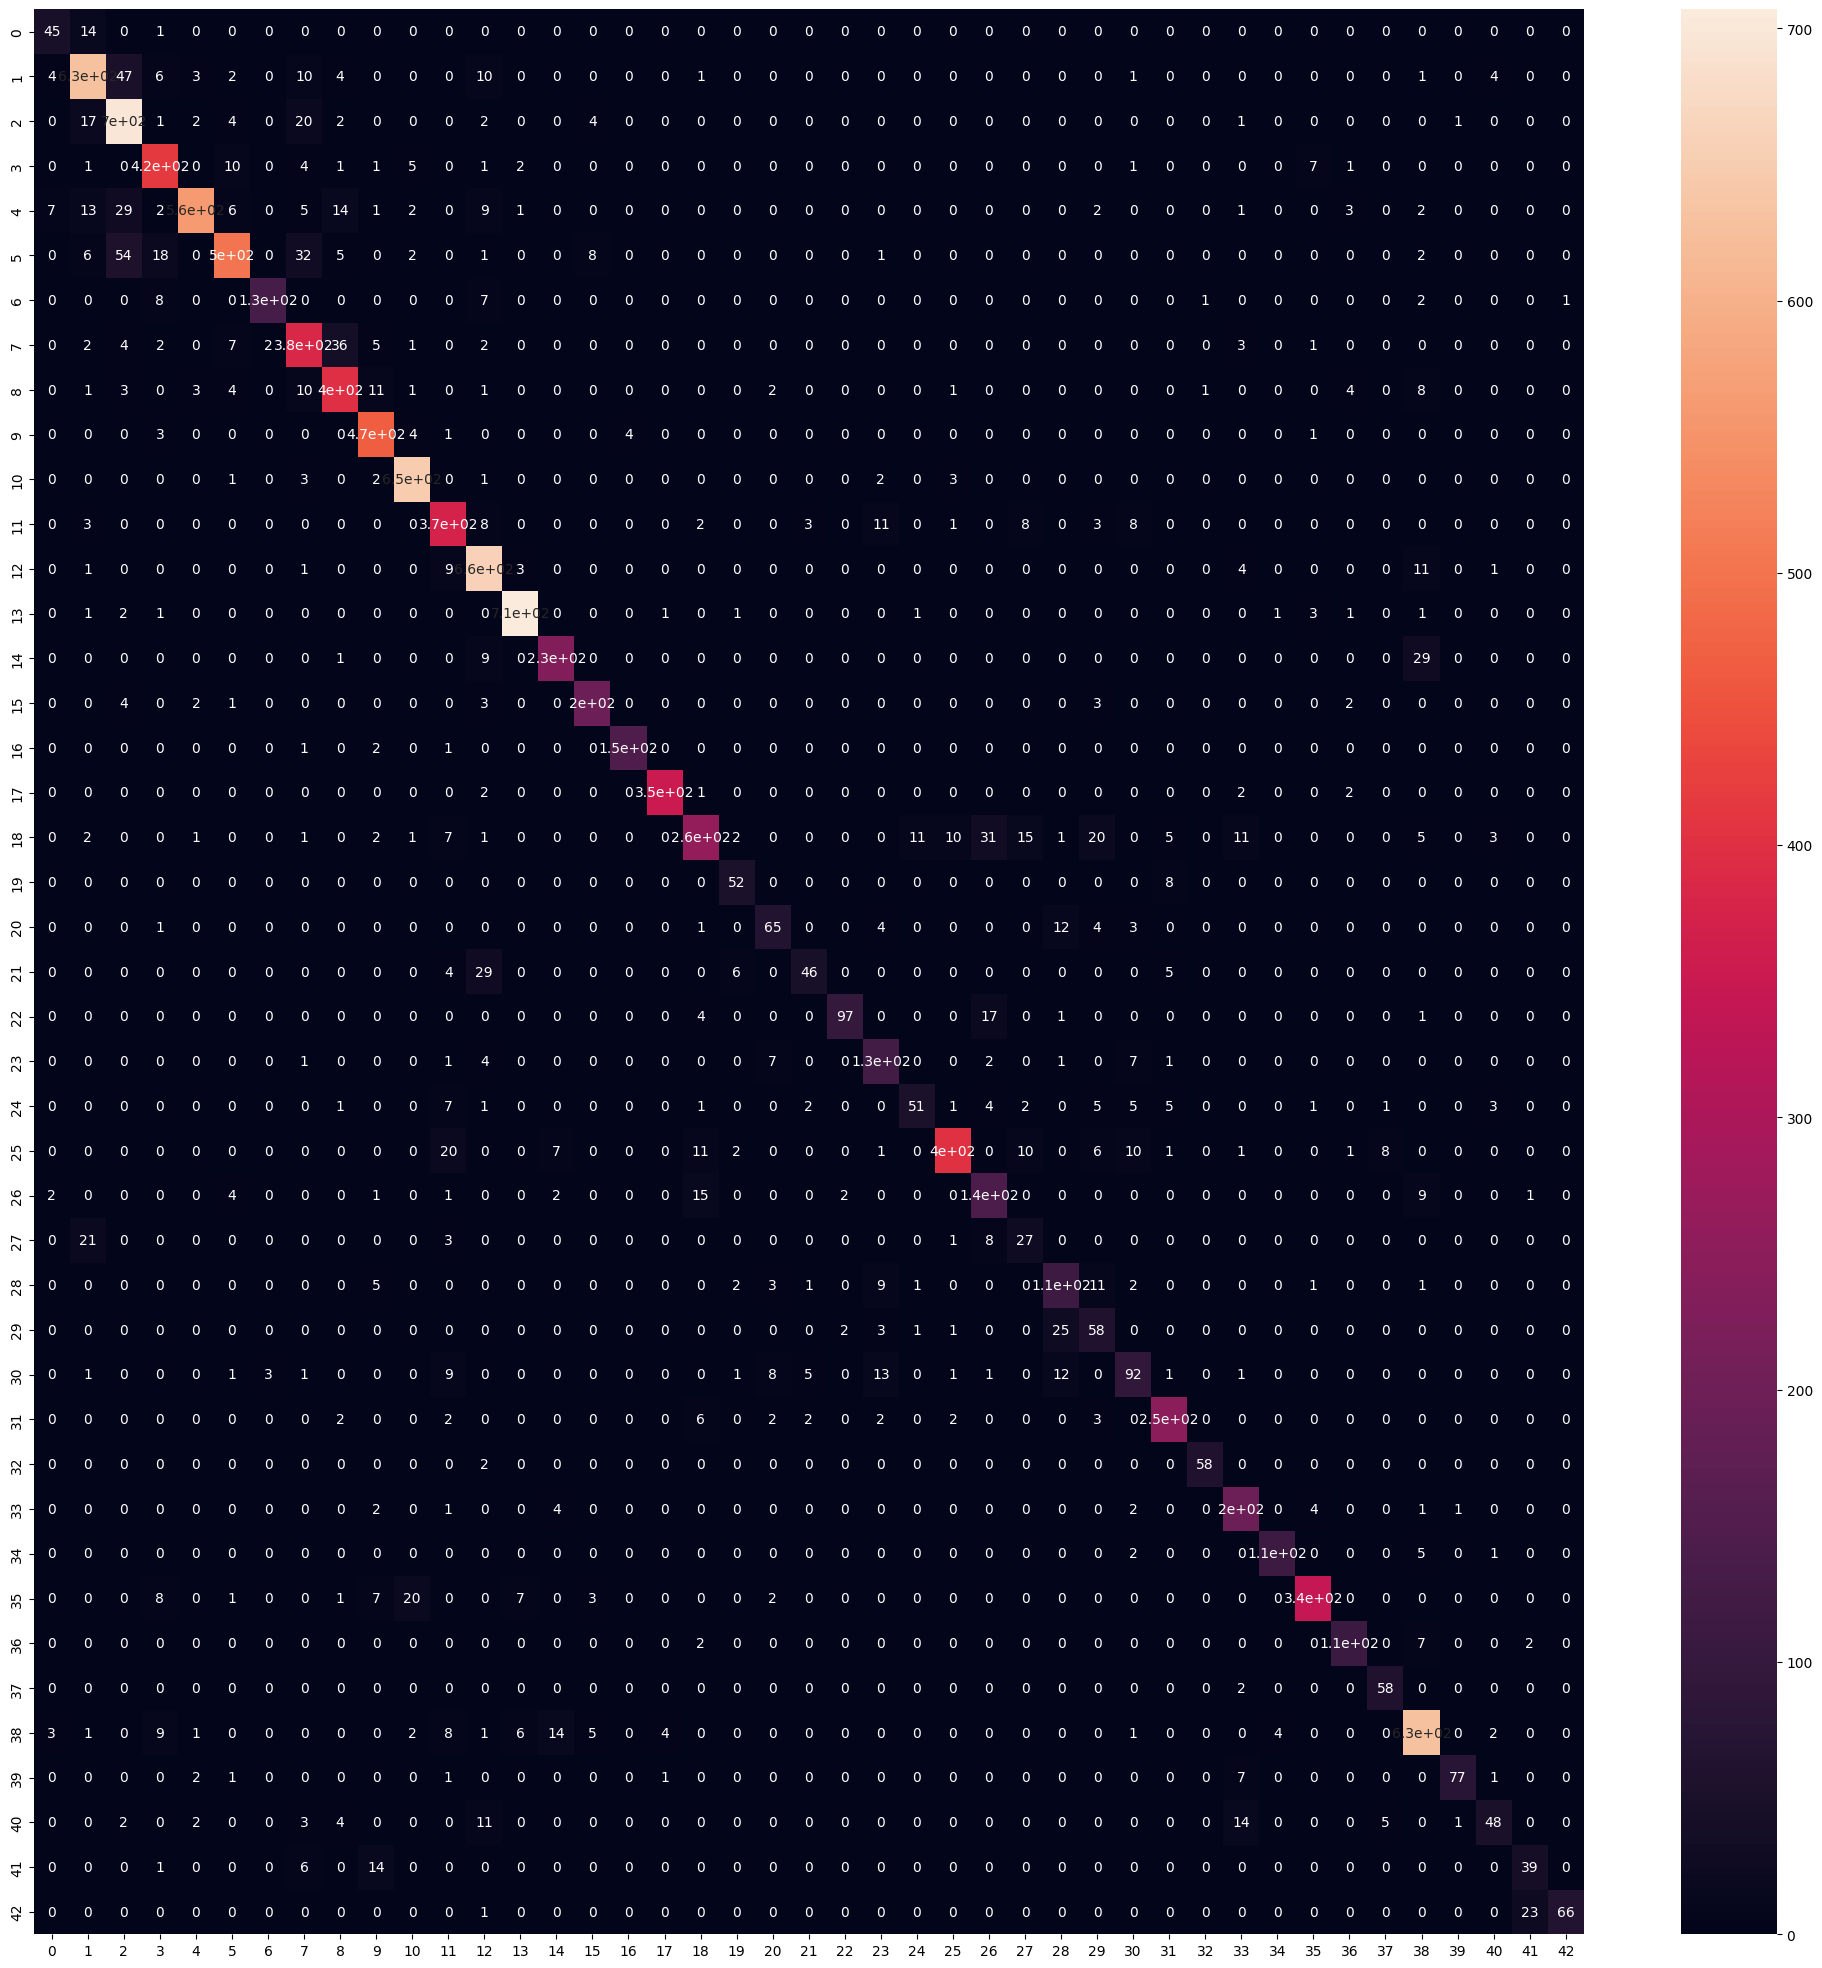

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

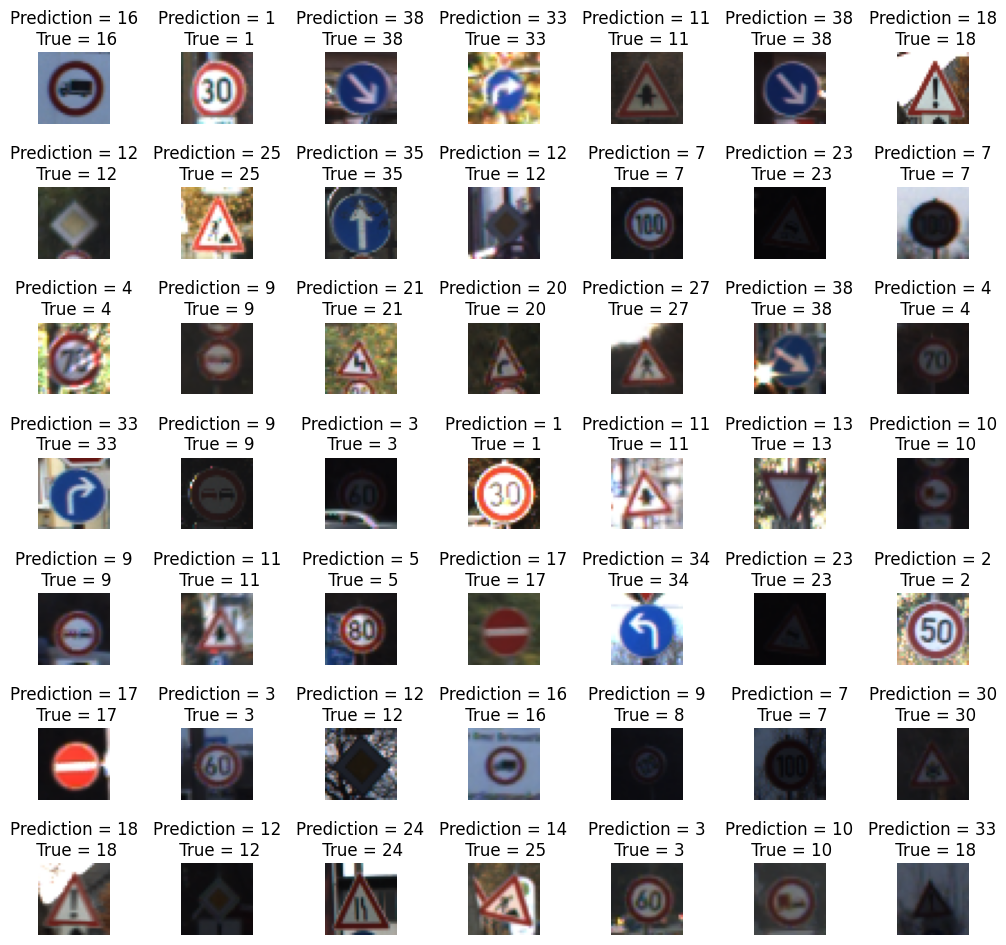

In [53]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)